In [3]:
import os
import torch
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from laplace import Laplace
import pandas as pd




from CIFAR_Data import get_cifar10_loaders
from CIFAR_MODEL import FixupWideResNet


import torch.utils.data as data_utils
import torchvision.transforms.functional as TF
from torchvision import transforms, datasets

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

In [4]:
datapath = os.path.join(os.getcwd(),"CIFAR-10-C","CIFAR-10-C")
corruptions = os.listdir(datapath)
corruptions.remove('desktop.ini')

In [5]:
## Load corrupted images on memory
corrupted_images = {}

for corruption in corruptions:
  if 'labels' in corruption:
    labels = np.load(os.path.join(datapath,corruption))
    continue

  corruption_type = corruption.split('.')[0]

  imgs = np.load(os.path.join(datapath,corruption))
  corrupted_images[corruption_type] = imgs

In [8]:
cor = ['snow', 'gaussian_noise', 'motion_blur']

np_x = { your_key: corrupted_images[your_key] for your_key in cor }

In [20]:
np_x['snow'][0].shape

(32, 32, 3)

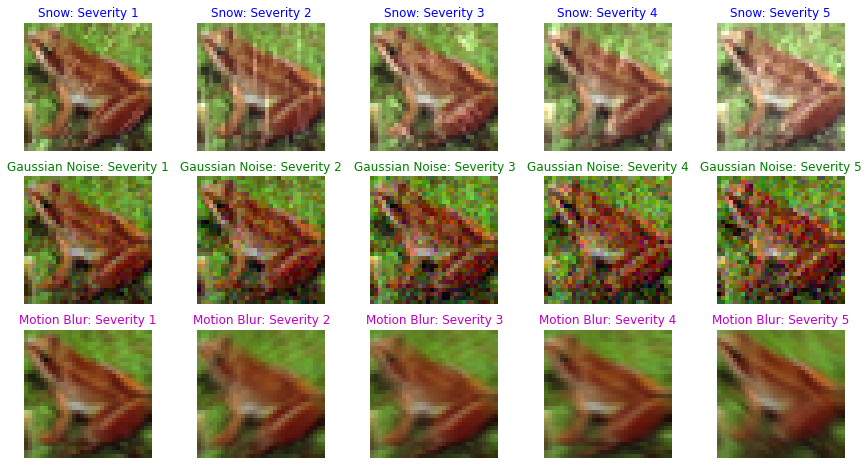

In [106]:
fig, axs = plt.subplots(3, 5, figsize=(15, 8))
idx =29

for i in range(0,5):
    
    axs[0,i].axis("off")
    axs[0,i].imshow(np_x['snow'][idx+i*10000])
    axs[0,i].set_title(f"Snow: Severity {i+1}",color="b")

    axs[1,i].axis("off")
    axs[1,i].imshow(np_x['gaussian_noise'][idx+i*10000])
    axs[1,i].set_title(f"Gaussian Noise: Severity {i+1}",color="green")


    axs[2,i].axis("off")
    axs[2,i].imshow(np_x['motion_blur'][idx+i*10000])
    axs[2,i].set_title(f"Motion Blur: Severity {i+1}",color="m")

